In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [128]:
df=pd.read_csv(r"C:\Users\hp\Downloads\List of Countries by Sugarcane Production.csv")

In [129]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [130]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

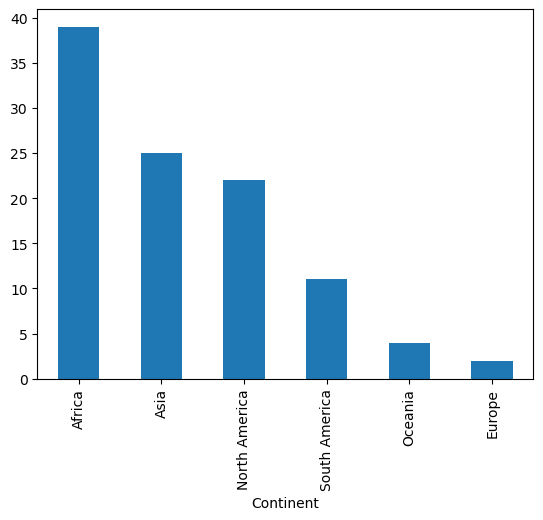

In [131]:
df['Continent'].value_counts().plot(kind='bar')

In [132]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [133]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [134]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [135]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [136]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [137]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [138]:
df.nunique()

Unnamed: 0                   103
Country                      103
Continent                      6
Production(Tons)             103
Production_per_person(Kg)    102
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [139]:
df.dtypes

Unnamed: 0                    int64
Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

df['Production (Tons)'] = pd.to_numeric(df['Production (Tons)'].replace('[^\d.]', '', regex=True), errors='coerce')
df['Production per Person (Kg)'] = pd.to_numeric(df['Production per Person (Kg)'].replace('[^\d.]', '', regex=True), errors='coerce')
df['Acreage (Hectare)'] = pd.to_numeric(df['Acreage (Hectare)'].replace('[^\d.]', '', regex=True), errors='coerce')
df['Yield (Kg / Hectare)'] = pd.to_numeric(df['Yield (Kg / Hectare)'].replace('[^\d.]', '', regex=True), errors='coerce') #this is used to convert to the null valuess! instead

In [140]:
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].str.replace(" ","")

In [141]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [142]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

# UNIVARIATE ANALYSIS

# how many countries produce what amount of the harvest

In [94]:
df["Continent"].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

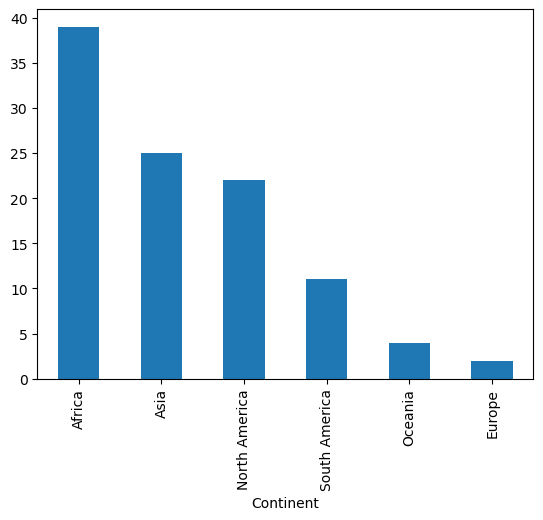

In [95]:
df["Continent"].value_counts().plot(kind = "bar")

In [96]:
df.describe()

,Unnamed: 0,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,103.000000,1.030000e+02,1.030000e+02,1.020000e+02,1.020000e+02
mean,51.000000,1.832407e+07,4.084763e+05,2.498981e+05,5.018502e+05
std,29.877528,8.379760e+07,8.636106e+05,1.137003e+06,3.169530e+05
min,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,25.500000,4.298850e+04,1.015600e+04,1.104000e+03,2.487505e+05
50%,51.000000,1.422432e+06,7.960600e+04,1.655800e+04,5.102500e+05
75%,76.500000,6.145648e+06,2.755895e+05,8.047400e+04,7.198920e+05
max,102.000000,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


import pandas as pd

#Example data with a column containing the problematic value
data = {'NumericColumn': ['123.45', '768.678.382', '987.65', '456.78']}
df = pd.DataFrame(data)

#Replace non-numeric characters and convert the column to numeric
df['NumericColumn'] = pd.to_numeric(df['NumericColumn'].replace('[^\d.]', '', regex=True), errors='coerce')

#Display the cleaned DataFrame
print(df)


# checking the outliers

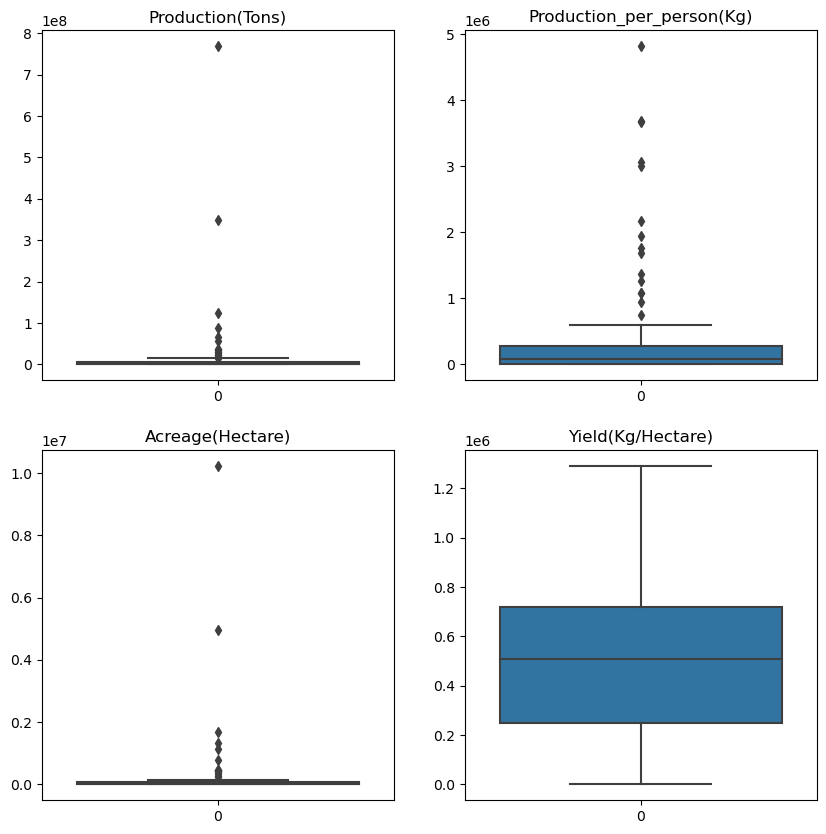

In [99]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.title('Production(Tons)')
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person(Kg)'])
plt.title('Production_per_person(Kg)')
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.title('Acreage(Hectare)')
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])
plt.title('Yield(Kg/Hectare)')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8396\2031174030.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8396\2031174030.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_person(Kg)'])
C:\Users\hp\AppData\L

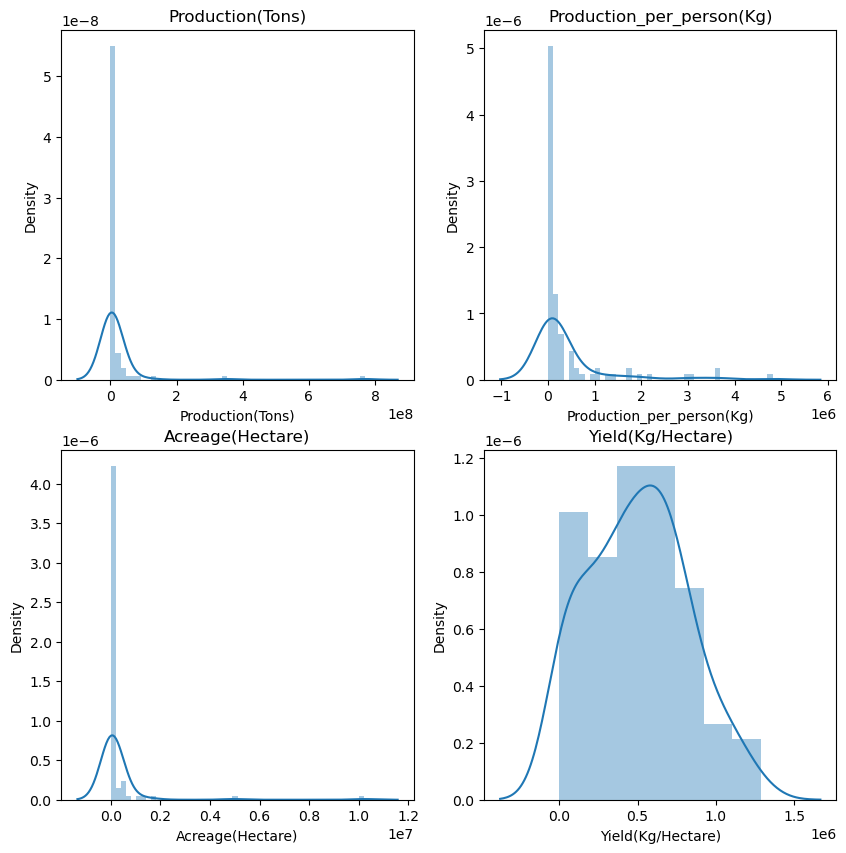

In [100]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.title('Production(Tons)')
plt.subplot(2,2,2)
sns.distplot(df['Production_per_person(Kg)'])
plt.title('Production_per_person(Kg)')
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.title('Acreage(Hectare)')
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])
plt.title('Yield(Kg/Hectare)')
plt.show()

In [101]:
#almost sbhi mai hain outliers except the yield(kg/hectare) wale ko chodkar

<Axes: >

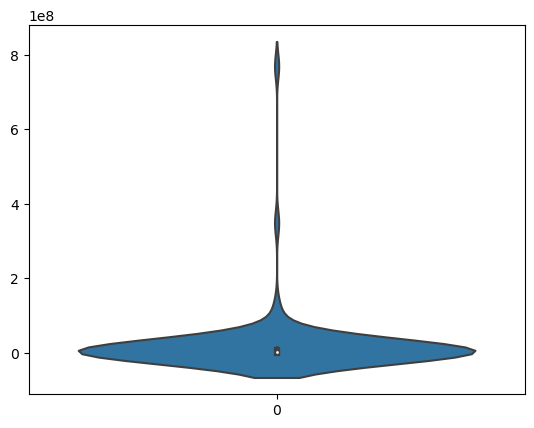

In [102]:
sns.violinplot(df['Production(Tons)'])

# bivariate analysis

In [103]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


In [107]:
df_new=df[['Country','Production(Tons)']].set_index('Country')
#agar inhi mai se kuch set kerna as a index toh uss column ka present hona is present or we can say that the set index command is used when there are things which we want to set as index in the respevtive new df as well!

In [108]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [110]:
df_new['Production(Tons) percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [111]:
df_new

,Production(Tons),Production(Tons) percent
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons) percent'>

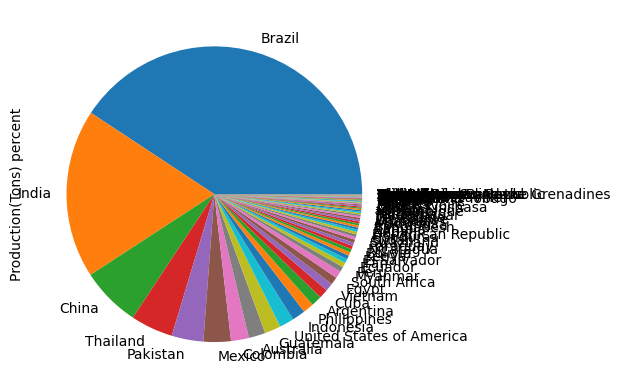

In [116]:
df_new['Production(Tons) percent'].plot(kind='pie')

<Axes: xlabel='Country'>

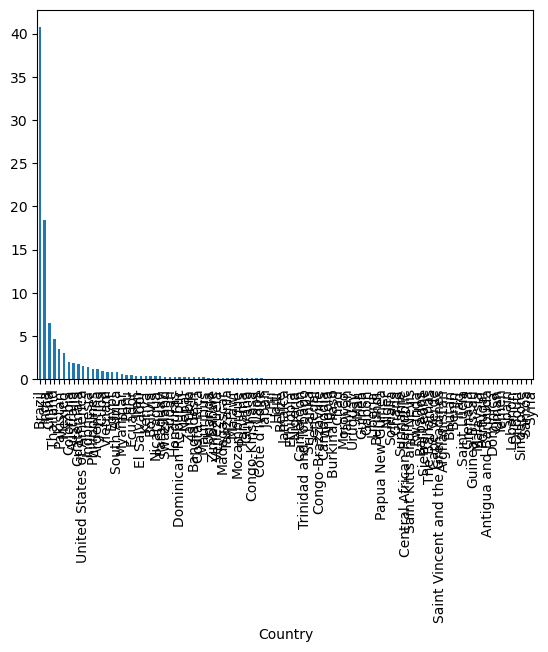

In [117]:
df_new['Production(Tons) percent'].plot(kind='bar')

<Axes: xlabel='Country'>

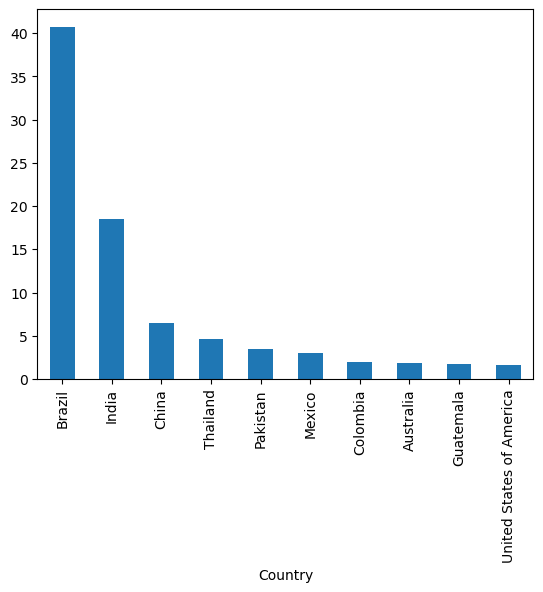

In [118]:
df_new['Production(Tons) percent'].head(10).plot(kind='bar')

In [150]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# Which country has the highest production in Tons

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

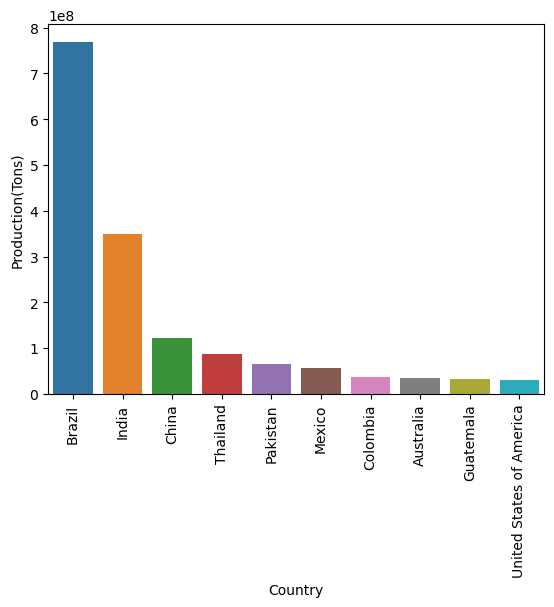

In [147]:
ax=sns.barplot(data=df.head(10),x='Country',y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Which country has the highest land

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

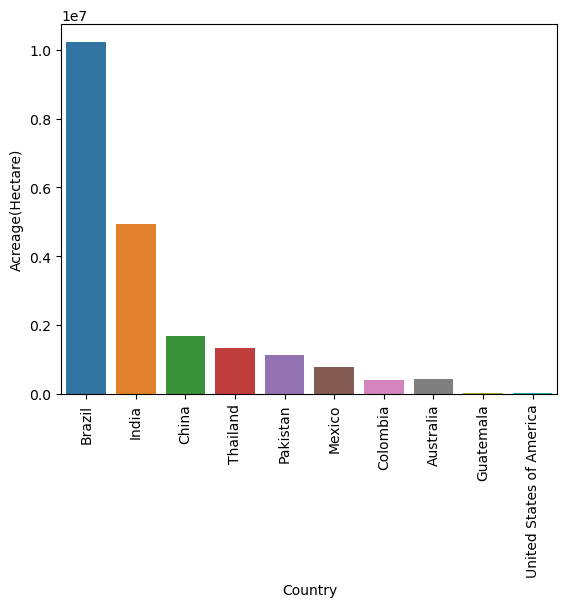

In [151]:
ax=sns.barplot(data=df.head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [152]:
#we can clearly see from the graph that brazil is the answer

In [153]:
#in this we just got the top 10 apperaing in the dataset if we want to sort it and then get for that we need to use this!

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

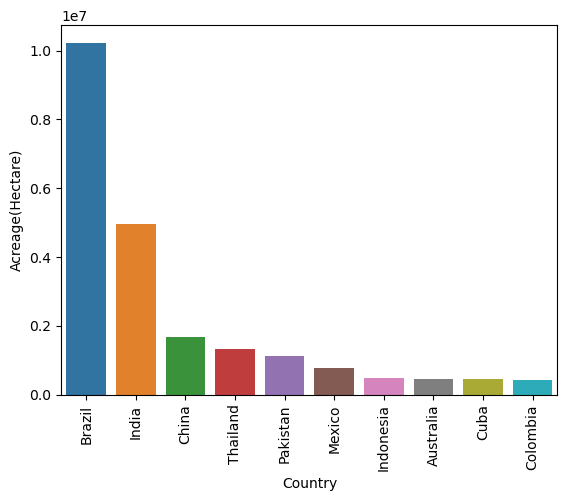

In [155]:
df_acre=df.sort_values('Acreage(Hectare)', ascending=False)
ax=sns.barplot(data=df_acre.head(10),x='Country',y='Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# Which country has got the highest Yield(Kg/Hectare)

[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

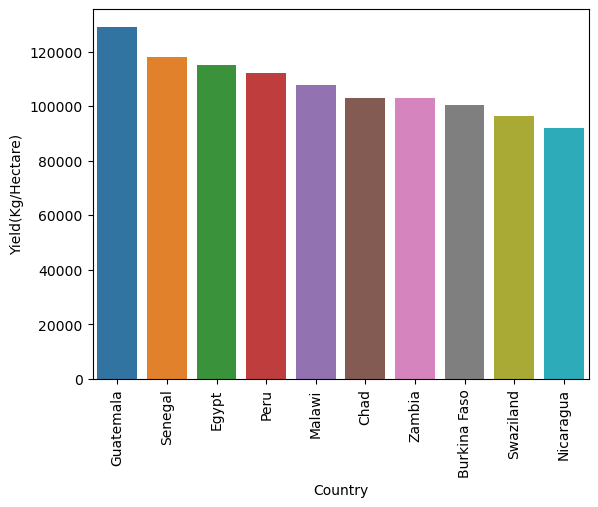

In [158]:
df_yield=df.sort_values('Yield(Kg/Hectare)',ascending=False)
ax=sns.barplot(data=df_yield.head(10),x='Country',y='Yield(Kg/Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#this data we got in the descending order and we can seee thatguaetmala has the highest of all

# Which country has highest production per person

[Text(0, 0, 'Paraguay'),
 Text(1, 0, 'Colombia'),
 Text(2, 0, 'Trinidad and Tobago'),
 Text(3, 0, 'Panama'),
 Text(4, 0, 'Jamaica'),
 Text(5, 0, 'Ecuador'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Dominican Republic'),
 Text(8, 0, 'Mexico'),
 Text(9, 0, 'Pakistan')]

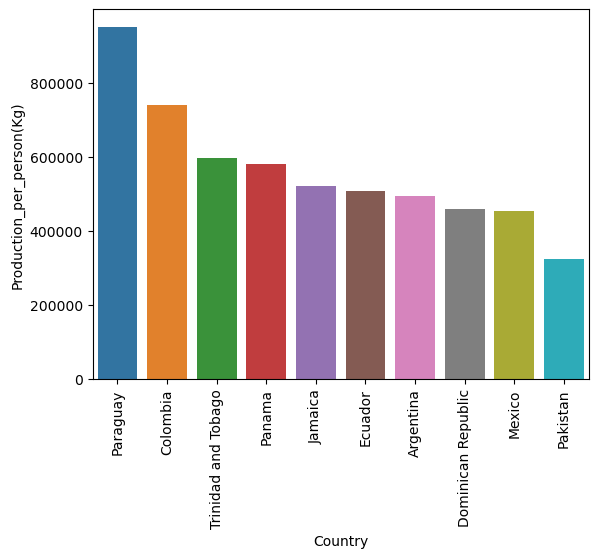

In [207]:
# df_pro=df.sort_values('Production_per_person(Kg)',ascending=False)
ax=sns.barplot(data=df_pro.head(10),x='Country',y='Production_per_person(Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #this is in the sns libaray xticklabels and in plt we have only xticks
#this data we got in the descending order and we can seee that paraguaey has the highest of all

In [164]:
df_1=df.drop(df[['Country','Continent']],axis=1)

# Corrlation

In [165]:
df_1.corr()

,Unnamed: 0,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Unnamed: 0,1.000000,-0.340808,-0.376831,-0.338820,-0.475832
Production(Tons),-0.340808,1.000000,0.016341,0.997550,0.132812
Production_per_person(Kg),-0.376831,0.016341,1.000000,0.012557,0.017999
Acreage(Hectare),-0.338820,0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),-0.475832,0.132812,0.017999,0.113433,1.000000


# Do counties with higher land has higher prodution

#as from the correlations obtained we can see that realtion between the acreage and the prodction (tons ) is 0.99 something which is 1 so yes is the answer


# Drawing the heatmap for that

<Axes: >

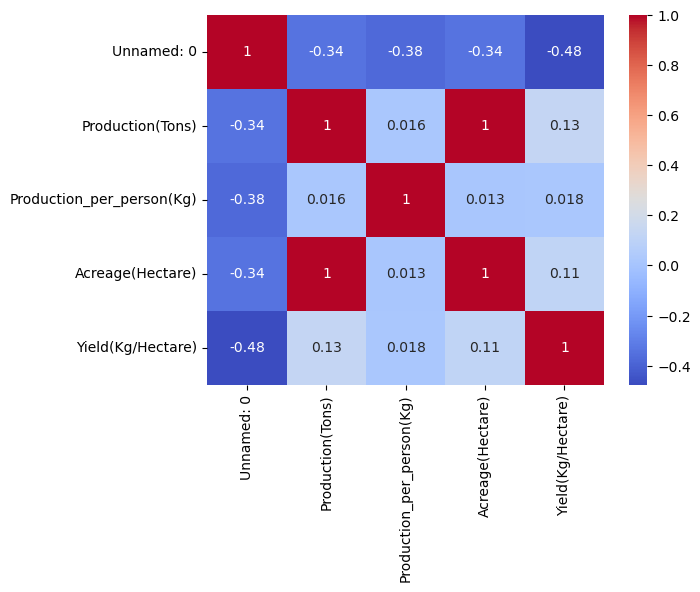

In [169]:
sns.heatmap(df_1.corr(),annot=True,cmap='coolwarm')

In [170]:
#yes related since the column is red over there and red indicated 1 acc to the color bar

In [171]:
#we can also see by the scatterplot

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

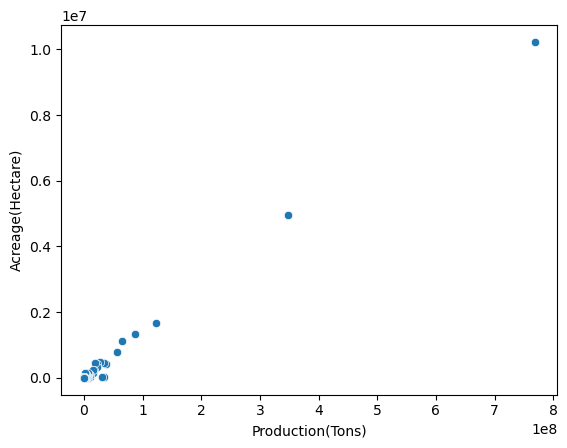

In [172]:
sns.scatterplot(data=df,x="Production(Tons)",y="Acreage(Hectare)")

clearly visible

# Do countries with more yield per hectare produce more of the sugarcane in total?

<Axes: xlabel='Production(Tons)', ylabel='Yield(Kg/Hectare)'>

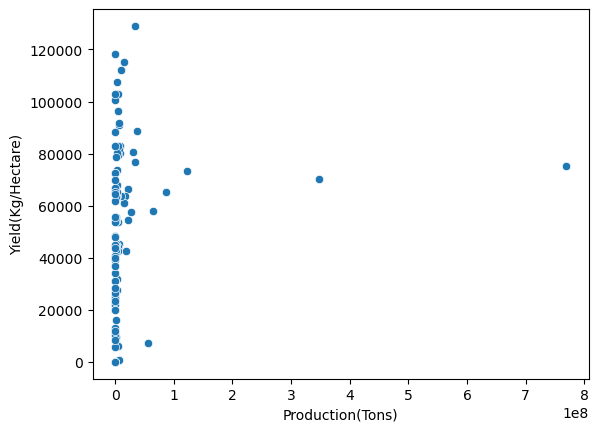

In [173]:
sns.scatterplot(data=df,x="Production(Tons)",y="Yield(Kg/Hectare)")

as we can it is not sice it is a not a y=x graph at all.hence not relatedd and proportional in nature

In [174]:
df_continent=df.groupby("Continent").sum()

In [180]:
df_continent=df_continent.drop(df_continent[['Country','Unnamed: 0']],axis=1)

In [181]:
df_continent

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681525.0,2332687.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


# Which continent has more number of countries?

<Axes: xlabel='Continent'>

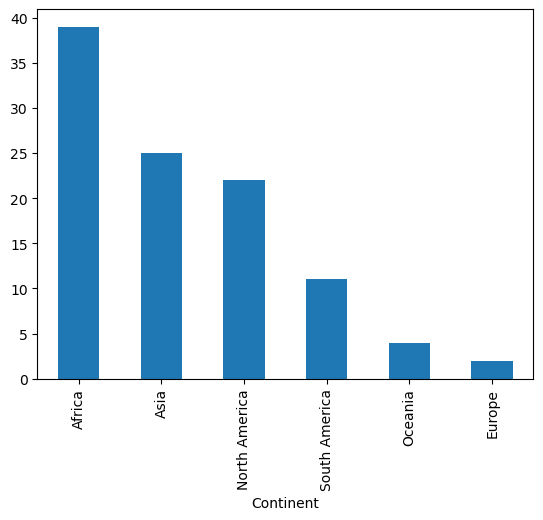

In [193]:
df['Continent'].value_counts().plot(kind='bar')

# Which continent produces more sugarcane

<Axes: xlabel='Continent'>

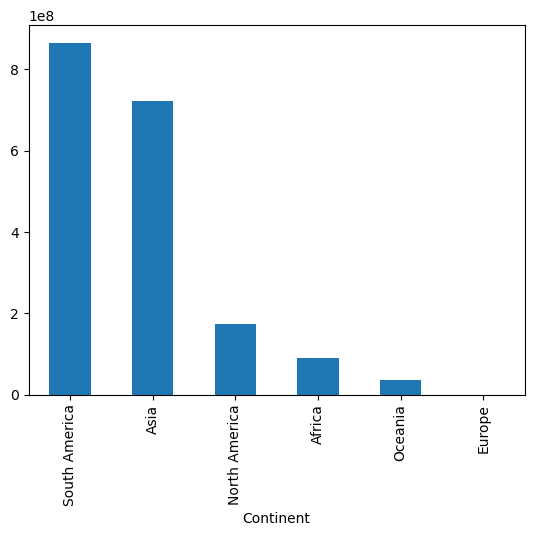

In [187]:
df1=df_continent.sort_values('Production(Tons)',ascending=False)
df1['Production(Tons)'].plot(kind='bar')
#the most is produced by south america

we can see that africa has more number of countries but south america produces more sugarcane

# which country has highest land for PRODUCTION

<Axes: xlabel='Continent'>

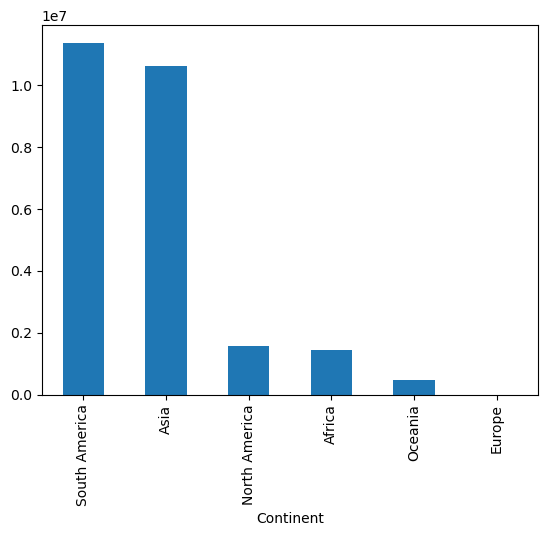

In [196]:
df1=df_continent.sort_values('Acreage(Hectare)',ascending=False)
df1['Acreage(Hectare)'].plot(kind='bar')
#the most land is owned by south america

# Does number of countries affect the net production?

In [199]:
df_continent['No. of countries']=df.groupby('Continent').count()['Country']

In [200]:
df_continent

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),No. of countries
Continent,,,,,
Africa,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


([<matplotlib.axis.XTick at 0x13dd9f73910>,
 [Text(39, 0, 'Africa'),
  Text(25, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(22, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(11, 0, 'South America')])

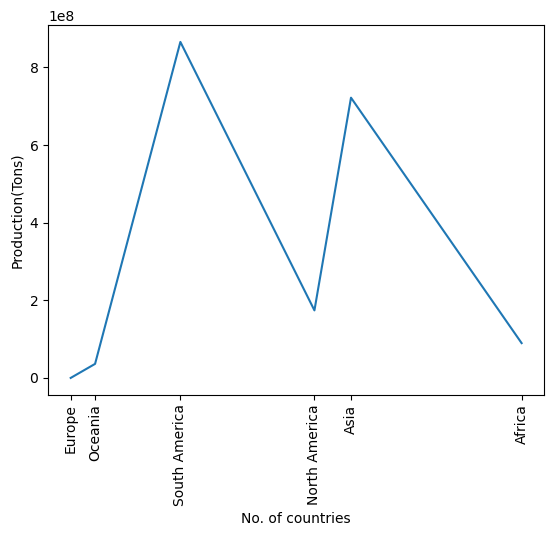

In [206]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x='No. of countries',y='Production(Tons)')
plt.xticks(df_continent['No. of countries'],continent_names,rotation=90)

# correlation

In [208]:
df_continent.corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),No. of countries
Production(Tons),1.000000,0.522207,0.994897,0.091201,0.098495
Production_per_person(Kg),0.522207,1.000000,0.463211,0.542971,0.531984
Acreage(Hectare),0.994897,0.463211,1.000000,0.111166,0.122407
Yield(Kg/Hectare),0.091201,0.542971,0.111166,1.000000,0.991746
No. of countries,0.098495,0.531984,0.122407,0.991746,1.000000


we can clearly see that production and acreage has 0.99 something value hence they are proportional in nature!

# Does the land area affects the production?

<Axes: xlabel='Acreage(Hectare)', ylabel='Acreage(Hectare)'>

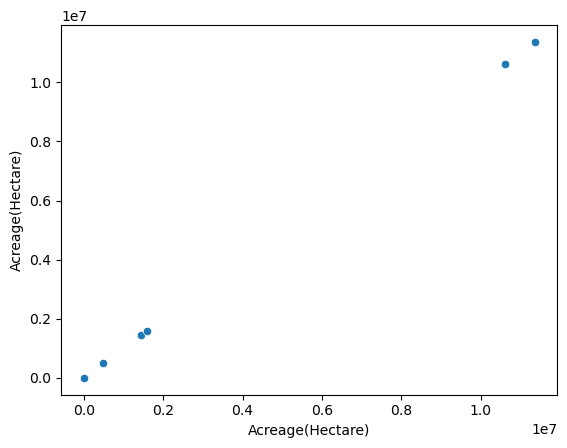

In [209]:
sns.scatterplot(data=df_continent,x='Acreage(Hectare)',y='Acreage(Hectare)')

# Production Distribution by Continent

C:\Users\hp\AppData\Local\Temp\ipykernel_8396\2352265438.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\hp\AppData\Local\Temp\ipykernel_8396\2352265438.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_person(Kg)'])
C:\Users\hp\AppData\L

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

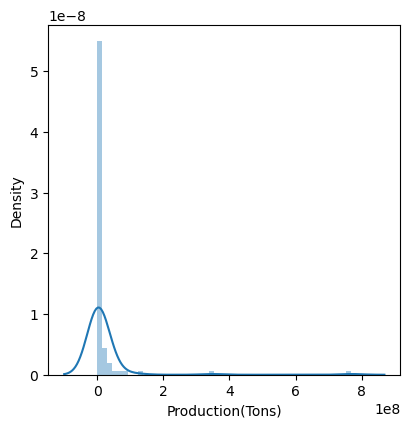

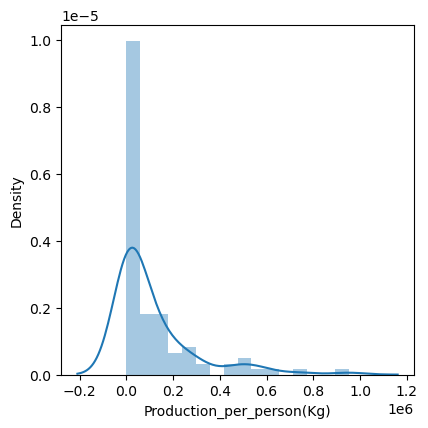

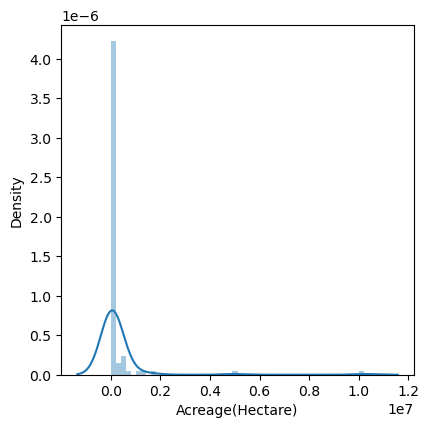

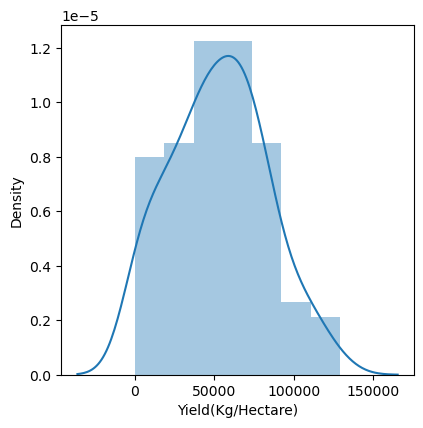

In [212]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.distplot(df['Production_per_person(Kg)'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])

In [213]:
#by using the pie chart

<Axes: ylabel='Production(Tons)'>

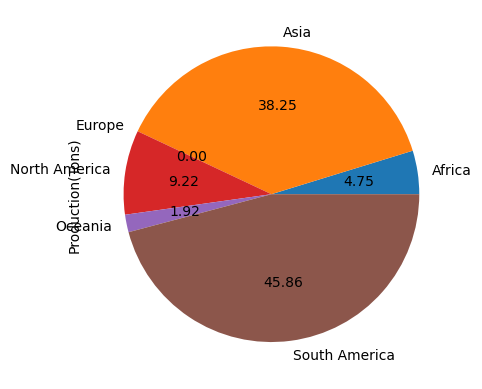

In [218]:
df_continent['Production(Tons)'].plot(kind='pie',autopct='%.2f',xticks=)